## Problem Statement:
##### The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

#### You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
data.describe() #units are in mm and grams

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

## Data encoding

In [8]:
# as we can see Sex column is having object/string datatype we have to encode it.

In [9]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

### M-male , F - female, I - Infant 
### we are encoding it by get dummies 

In [10]:
categories = data['Sex']

In [11]:
categories

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [12]:
df_dummies = pd.get_dummies(categories,drop_first=False)

In [13]:
df = data.join(df_dummies)

#### droping sex column as we have encoded it in form of F,I,M

In [14]:
df.drop(columns=['Sex'],inplace=True)

In [15]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [16]:
### changing target column in terms of age
def labels(x):
  if x<=10:
    return 'young'
  if x<=20:
    return 'middle_age'
  if x<=30:
    return 'old'
df['Rings']=df['Rings'].apply(labels)

## Ordinal encoder

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [19]:
ordinal_column=['Rings']
df=ordinal_encoder(df,ordinal_column)

In [20]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [21]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
F                 0
I                 0
M                 0
dtype: int64

In [22]:
df.shape

(4177, 11)

In [23]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

## EDA(Exploratory data analysis)

In [24]:
import warnings
warnings.filterwarnings("ignore")

### Data distribution (Skewness check)

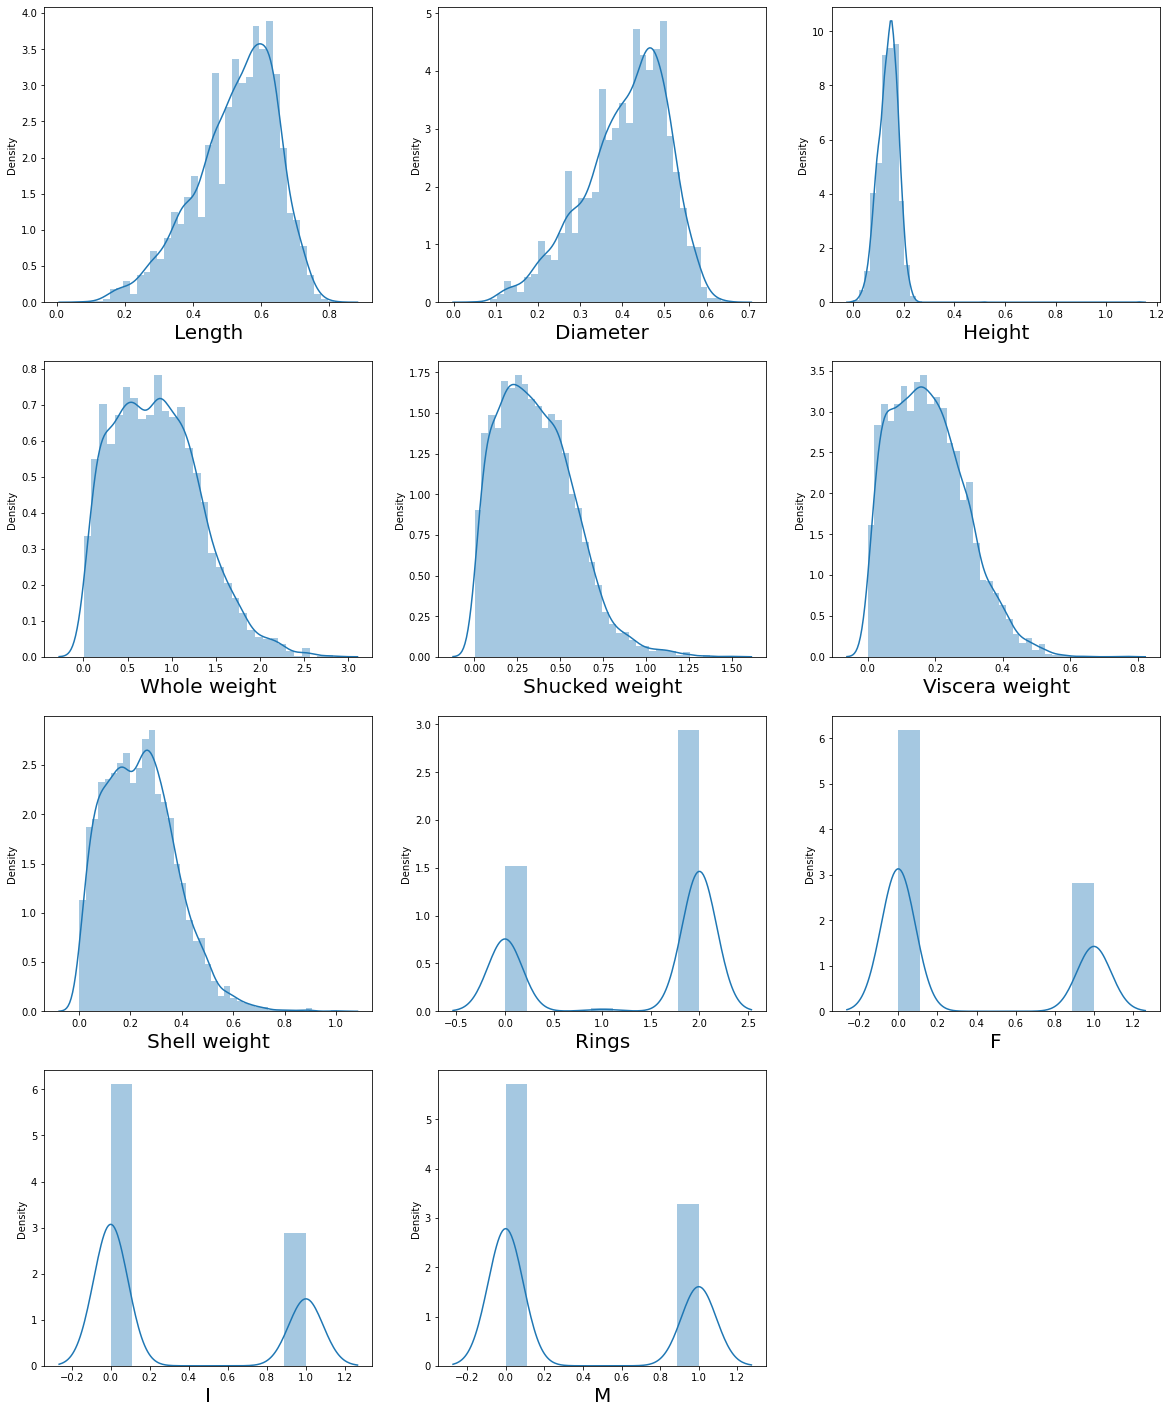

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=12: #as there are 12 columns in data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

#### As we can see there soo much skewness in column- length','Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', Skewness should be removed
#### Remaining columns Rings, Female,male and infant are categorical data 

In [26]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
I                 0.330770
M                -0.133440
F                -0.194504
Shucked weight   -0.342275
Length           -0.403108
Height           -0.413908
Viscera weight   -0.414224
Diameter         -0.420410
Whole weight     -0.433438
Shell weight     -0.492458
Name: Rings, dtype: float64

<AxesSubplot:title={'center':'Correlation with Rings'}>

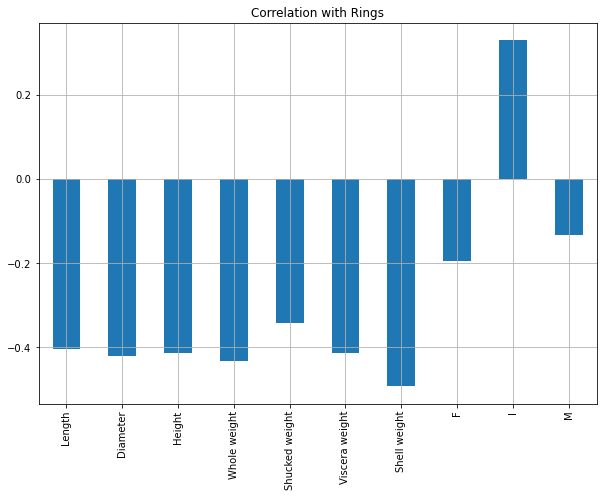

In [27]:
# visualize the correlation
df.drop('Rings', axis =1).corrwith(df['Rings']).plot(kind ='bar',grid = True, figsize = (10,7),
                                                   title = 'Correlation with Rings')

##### all columns are having good correlation with rings column

#### plotting heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

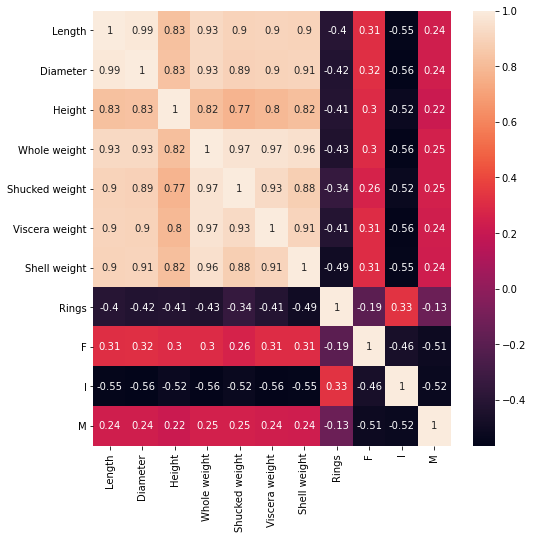

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show

#### as we can see by heatmap and scatterplot we have to check multicollinearity problem as they are highly correlated
#### we will see variance inflation factor(vif) and then check trends by scatterplot(for multicolinearity) in data cleaning.

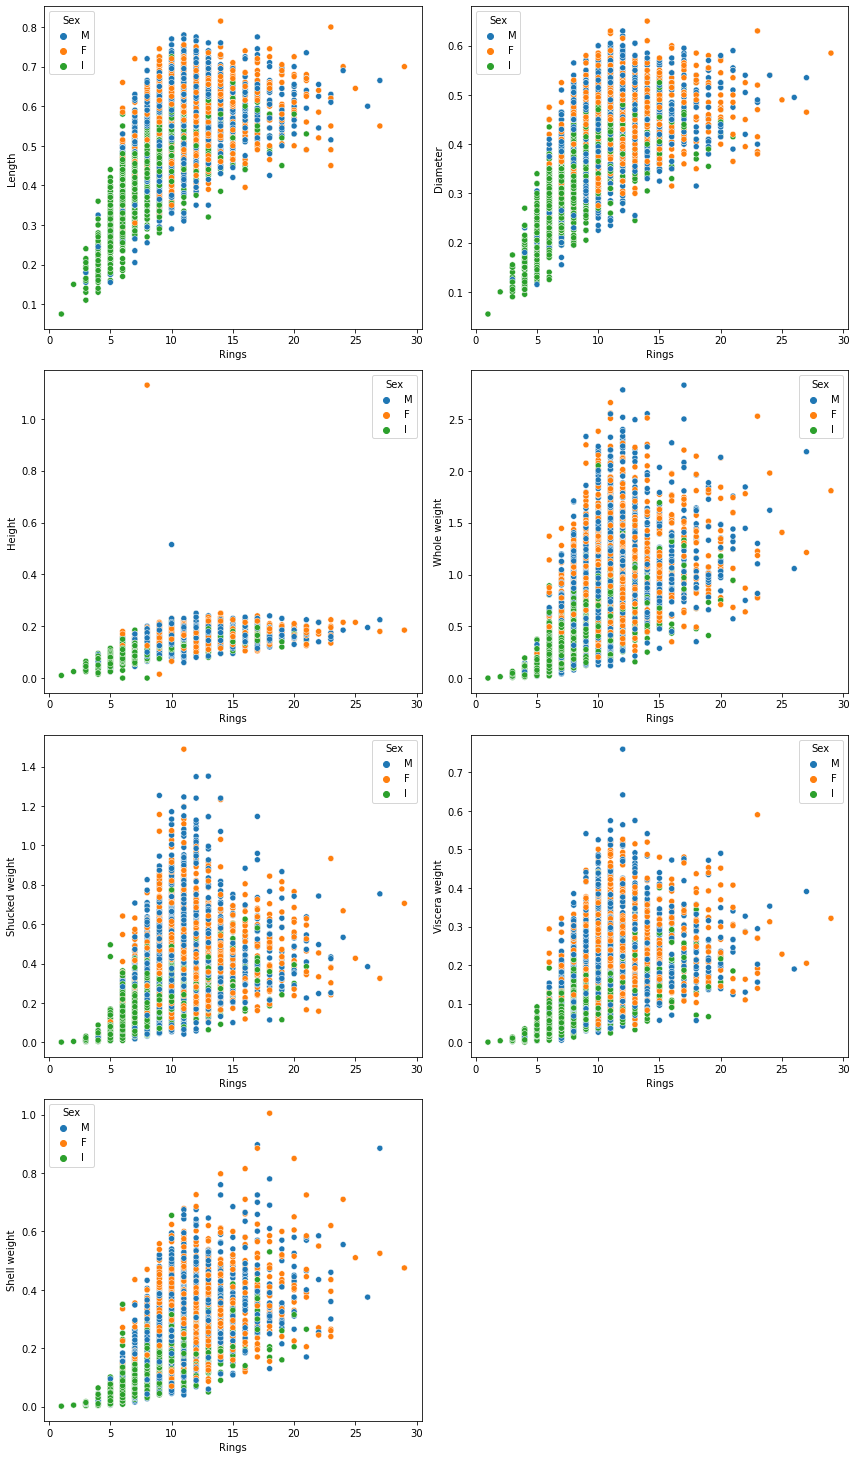

In [29]:
col=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
df1=data[col]
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data.Rings,y=data[col[i]],hue=data.Sex)
  plt.tight_layout()

### variance influnence factor(vif for seeing multicollinearity)

In [30]:
## after skewness and outliers are removed we scale data then we will check for multicolinearity

In [31]:
df =df.rename(columns={'Whole weight':'Whole_weight','Shucked weight':'Shucked_weight','Viscera weight':'Viscera_weight',
                      'Shell weight':'Shell_weight'})
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


### checking for outliers

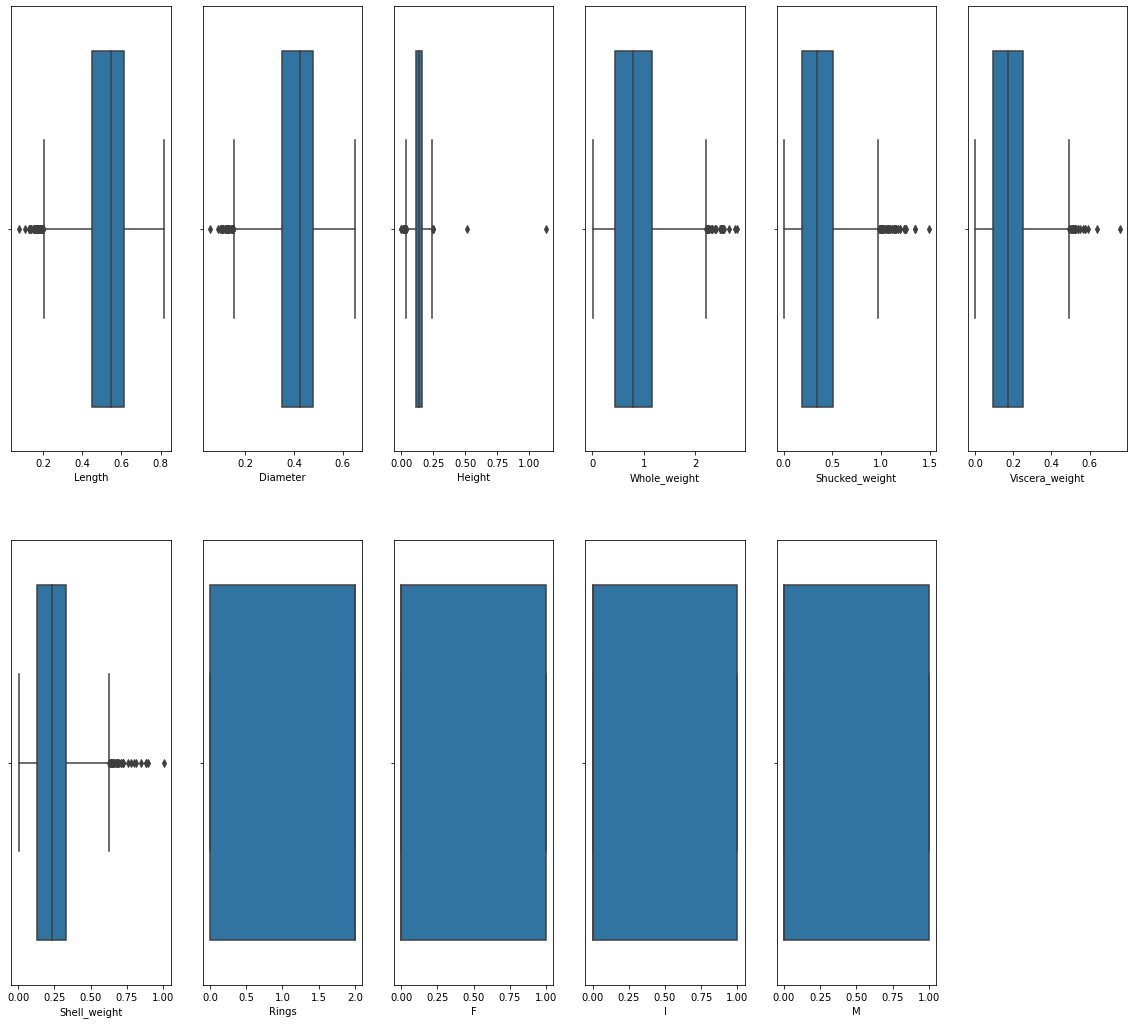

In [32]:
plt.figure(figsize=(20,18))
graph=1

for column in df:
    if graph<=12:
        ax=plt.subplot(2,6,graph)
        sns.boxplot(df[column],orient="h")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

### seems to have outliers soo it should be removed by Inter quantile range(IQR)

Data preprocessing

#### 1) Removing outliers(IQR)
#### 2) Removing skewness(power transformer)
#### 3) data scaling (standard scaler)
#### 4) checking multicolinearity(vif)

### Inter quantile range(IQR)

Outfiers detection formula

higherside==> Q3+(1.5*IQR)

lowerside==>Q3 -(1.5*IQR)

In [33]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [34]:
#quantile 1
q1=df.quantile(0.25)
#QUANTILE 3
q3=df.quantile(0.75)

IQR=q3-q1
IQR

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
Rings             2.0000
F                 1.0000
I                 1.0000
M                 1.0000
dtype: float64

In [35]:
Lt_high=(q3.Length-1.5*IQR.Length)
print(Lt_high)
index = np.where(df['Length']<Lt_high)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.36750000000000005
(3697, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3692,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3693,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3694,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3695,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [36]:
dia_low=(q3.Diameter-1.5*IQR.Diameter)
print(dia_low)
index = np.where(df['Diameter']<dia_low)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.285
(3624, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3619,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3620,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3621,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3622,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [37]:
ht=(q3.Height+1.5*IQR.Height)
print(ht)
index = np.where(df['Height']>ht)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.24000000000000002
(3619, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3614,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3615,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3616,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3617,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [38]:
Whole_wht =(q3.Whole_weight+1.5*IQR.Whole_weight)
print(Whole_wht)
index = np.where(df['Whole_weight']>Whole_wht)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.22025
(3591, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3587,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3588,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3589,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [39]:
Vis_wht =(q3.Viscera_weight+1.5*IQR.Viscera_weight)
print(Vis_wht)
index = np.where(df['Viscera_weight']>Vis_wht)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.49225
(3579, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3574,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3575,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3576,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3577,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [40]:
shell_wht =(q3.Shell_weight+1.5*IQR.Shell_weight)
print(shell_wht)
index = np.where(df['Shell_weight']>shell_wht)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.6275
(3555, 11)


,index,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0,0,1
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.0,1,0,0
2,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,0,0,1
3,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2.0,0,1,0
4,6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3550,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1,0,0
3551,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,0,0,1
3552,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,0,0,1
3553,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.0,1,0,0


In [41]:
x = df.drop(columns=['Rings'],axis=1)
y = df['Rings']

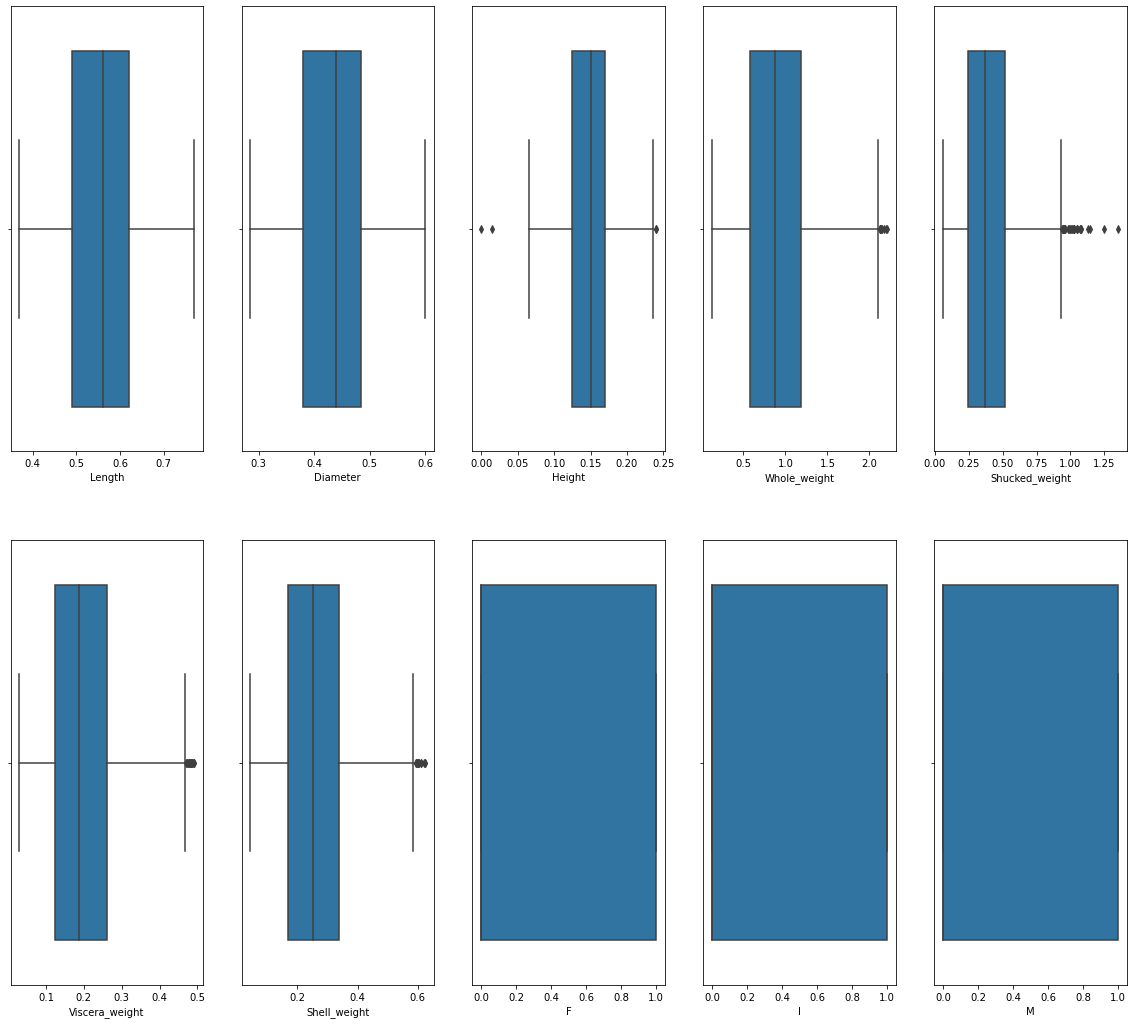

In [42]:
plt.figure(figsize=(20,18))
graph=1

for column in x:
    if graph<=12:
        ax=plt.subplot(2,5,graph)
        sns.boxplot(x[column],orient="h")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [43]:
features = ['Length','Diameter','Height','Shucked_weight','Whole_weight','Shell_weight','Viscera_weight']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[features]  = pt.fit_transform(df[features].values)
df[features]

,Length,Diameter,Height,Shucked_weight,Whole_weight,Shell_weight,Viscera_weight
0,-1.166594,-0.971552,-1.779067,-0.914277,-0.976160,-0.987510,-1.094195
2,-0.316389,-0.213533,-0.413203,-0.690136,-0.489273,-0.364029,-0.546173
3,-1.330982,-0.971552,-0.751160,-0.979656,-0.969838,-0.932543,-0.911258
5,-1.493489,-1.821076,-1.779067,-1.564573,-1.523373,-1.329869,-1.443178
6,-0.316389,-0.283937,0.089474,-0.825205,-0.214618,0.681541,-0.546173
...,...,...,...,...,...,...,...
4172,0.096543,0.215187,0.587142,0.012665,0.065632,0.002573,0.545127
4173,0.397815,0.071079,-0.413203,0.380727,0.256816,0.105438,0.297276
4174,0.519800,0.580722,1.890621,0.790726,0.726151,0.507200,0.991726
4175,0.828460,0.729048,0.089474,0.815077,0.550241,0.409071,0.754585


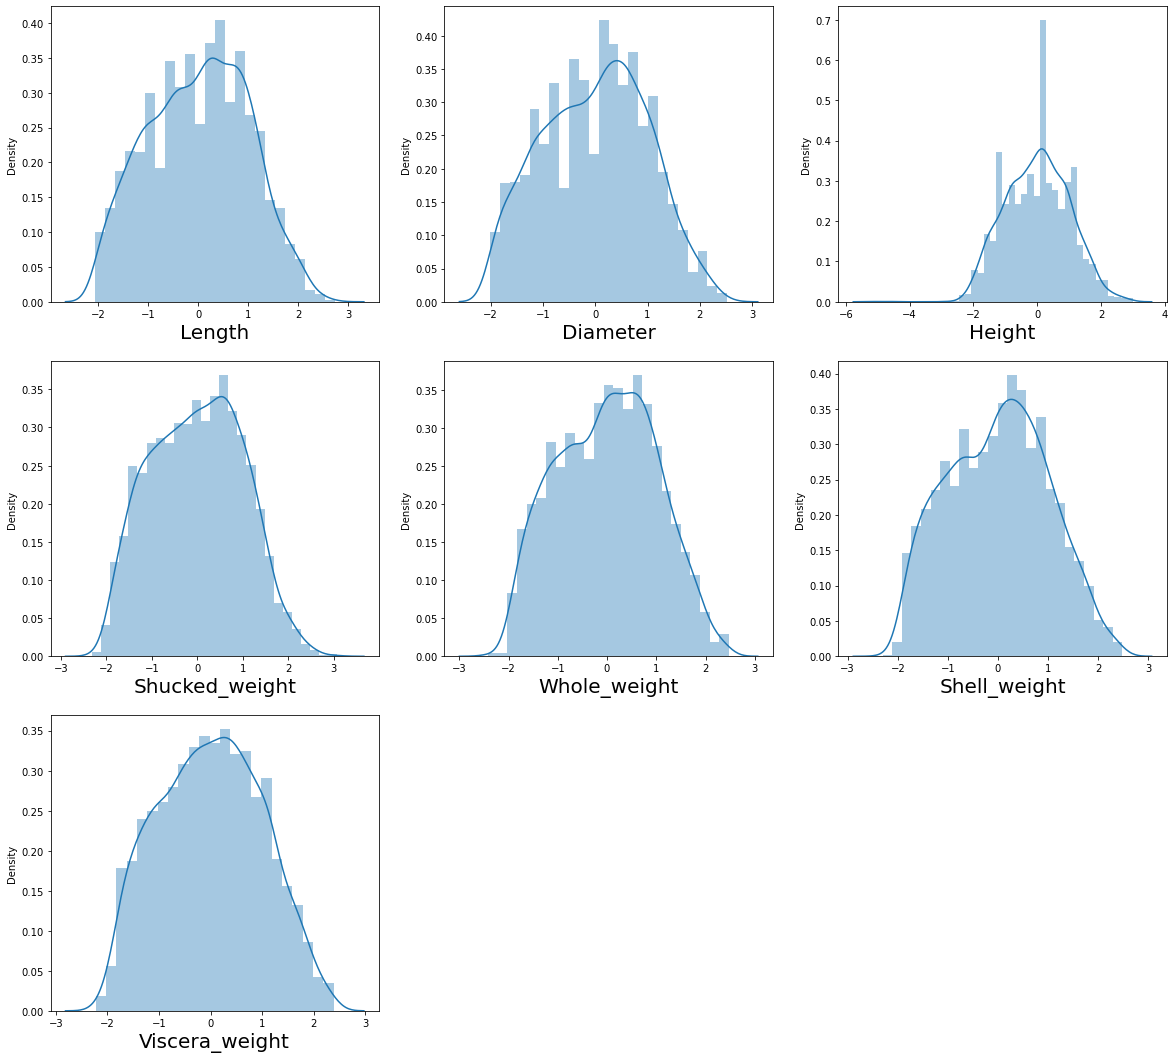

In [44]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df[features]:
    if plotnumber<=12: #as there are 12 columns in data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [45]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,F,I,M
0,-1.166594,-0.971552,-1.779067,-0.976160,-0.914277,-1.094195,-0.987510,0.0,0,0,1
2,-0.316389,-0.213533,-0.413203,-0.489273,-0.690136,-0.546173,-0.364029,2.0,1,0,0
3,-1.330982,-0.971552,-0.751160,-0.969838,-0.979656,-0.911258,-0.932543,2.0,0,0,1
5,-1.493489,-1.821076,-1.779067,-1.523373,-1.564573,-1.443178,-1.329869,2.0,0,1,0
6,-0.316389,-0.283937,0.089474,-0.214618,-0.825205,-0.546173,0.681541,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.096543,0.215187,0.587142,0.065632,0.012665,0.545127,0.002573,0.0,1,0,0
4173,0.397815,0.071079,-0.413203,0.256816,0.380727,0.297276,0.105438,2.0,0,0,1
4174,0.519800,0.580722,1.890621,0.726151,0.790726,0.991726,0.507200,2.0,0,0,1
4175,0.828460,0.729048,0.089474,0.550241,0.815077,0.754585,0.409071,2.0,1,0,0


## as we can see imbalancing of dataset we will balance it by SMOTE

In [46]:
df['Rings'].value_counts()

2.0    2182
0.0    1341
1.0      32
Name: Rings, dtype: int64

In [47]:
x = df.drop(columns = ['Rings'],axis=1)
y = df['Rings']

In [48]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(x,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Rings'])

### Standard scaler and multicolinearity

In [49]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)
X_scaled[1]

array([-0.56792655, -0.47428941, -0.76644633, -0.79850289, -0.84796867,
       -0.78785368, -0.75023739,  1.27092946, -0.42462941, -0.7880987 ])

In [51]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_new.columns

# lets check the vif
vif

,vif,Features
0,23.612558,Length
1,22.010781,Diameter
2,4.423588,Height
3,75.173405,Whole_weight
4,19.116865,Shucked_weight
5,12.629084,Viscera_weight
6,19.864730,Shell_weight
7,3.658889,F
8,3.035642,I
9,3.816919,M


### as we can see vif >5 are highly corelated we will drop Length and shucked_weight to avoid multicollinearity

In [52]:
X_new

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,F,I,M
0,-1.166594,-0.971552,-1.779067,-0.976160,-0.914277,-1.094195,-0.987510,0,0,1
1,-0.316389,-0.213533,-0.413203,-0.489273,-0.690136,-0.546173,-0.364029,1,0,0
2,-1.330982,-0.971552,-0.751160,-0.969838,-0.979656,-0.911258,-0.932543,0,0,1
3,-1.493489,-1.821076,-1.779067,-1.523373,-1.564573,-1.443178,-1.329869,0,1,0
4,-0.316389,-0.283937,0.089474,-0.214618,-0.825205,-0.546173,0.681541,1,0,0
...,...,...,...,...,...,...,...,...,...,...
6541,0.861048,0.675950,1.483189,0.857553,0.399861,1.070584,1.195475,1,0,0
6542,0.830097,0.986881,1.954025,0.805708,0.285313,0.994250,1.140174,1,0,0
6543,0.822887,0.694369,1.838606,1.057284,0.159903,0.868042,1.578509,1,0,0
6544,-0.474813,-0.481030,0.392432,-0.117850,-0.725543,-0.379406,0.425047,0,0,1


### Now data is ready for training 

### random_state selection

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)
    

At random state 35 model perform very well
At random state 35
Training accuracy score is 75.21008403361344
Testing accuracy score is 75.19083969465649
At random state 63 model perform very well
At random state 63
Training accuracy score is 75.32467532467533
Testing accuracy score is 75.26717557251908
At random state 93 model perform very well
At random state 93
Training accuracy score is 75.24828113063407
Testing accuracy score is 75.19083969465649
At random state 211 model perform very well
At random state 211
Training accuracy score is 75.05729564553094
Testing accuracy score is 75.1145038167939
At random state 238 model perform very well
At random state 238
Training accuracy score is 75.32467532467533
Testing accuracy score is 75.26717557251908
At random state 299 model perform very well
At random state 299
Training accuracy score is 75.17188693659283
Testing accuracy score is 75.19083969465649
At random state 306 model perform very well
At random state 306
Training accuracy score i

In [55]:
### selecting random_State = 699

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state=699)

## 1) logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))

75.26717557251908
              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61       418
         1.0       0.87      0.91      0.89       474
         2.0       0.73      0.73      0.73       418

    accuracy                           0.75      1310
   macro avg       0.74      0.75      0.74      1310
weighted avg       0.75      0.75      0.75      1310



## 2) Decision Tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))

80.38167938931298
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       418
         1.0       0.96      0.99      0.97       474
         2.0       0.72      0.71      0.72       418

    accuracy                           0.80      1310
   macro avg       0.79      0.80      0.79      1310
weighted avg       0.80      0.80      0.80      1310



## 3)Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))

86.25954198473282
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       418
         1.0       0.97      1.00      0.98       474
         2.0       0.84      0.74      0.79       418

    accuracy                           0.86      1310
   macro avg       0.86      0.86      0.86      1310
weighted avg       0.86      0.86      0.86      1310



## 4) Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))

79.69465648854963
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       418
         1.0       0.91      0.98      0.94       474
         2.0       0.75      0.71      0.73       418

    accuracy                           0.80      1310
   macro avg       0.79      0.79      0.79      1310
weighted avg       0.79      0.80      0.79      1310



## 5) Xtreme gradient boosting

In [64]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train,y_train)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))

[00:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
84.7328244274809
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       418
         1.0       0.97      1.00      0.98       474
         2.0       0.80      0.74      0.77       418

    accuracy                           0.85      1310
   macro avg       0.84      0.84      0.84      1310
weighted avg       0.85      0.85      0.85      1310



## 6)Support vector machine(svc)

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))

78.47328244274809
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67       418
         1.0       0.90      0.95      0.92       474
         2.0       0.76      0.71      0.73       418

    accuracy                           0.78      1310
   macro avg       0.78      0.78      0.78      1310
weighted avg       0.78      0.78      0.78      1310



### cross validation

In [98]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X_new, y_new, cv=5)
print("Cross validation score of random forest model is",scr.mean()*100)

Cross validation score of random forest model is 85.19772100373807


### as we can random forest is performing better for this dataset so we do hypertuning to increse its efficiency

In [99]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'criterion':['gini','entropy'],
            'min_samples_split':range(2,10,2),
            'min_samples_leaf':range(1,10,2),
            'n_estimators': range(90,100,2)
           }

In [101]:
GCV = GridSearchCV(rf,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting with best parameter 
accuracy_score(y_test, GCV_pred)                  #checking final accuracy

0.8610687022900764

In [103]:
GCV.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 98}

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=2,n_estimators=98)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))

86.56488549618321
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       418
         1.0       0.97      1.00      0.98       474
         2.0       0.84      0.75      0.79       418

    accuracy                           0.87      1310
   macro avg       0.86      0.86      0.86      1310
weighted avg       0.87      0.87      0.86      1310



In [107]:
import joblib
joblib.dump(GCV.best_estimator_,'Abalone.pkl')

['Abalone.pkl']

In [110]:
model=joblib.load("E:\Data science\capstone project\Abalone\Abalone.pkl")

In [112]:
y_preds=model.predict(x_test)

In [114]:
predicted=pd.DataFrame(pred_rf,columns=['predicted'])

In [115]:
predicted

,predicted
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1305,0.0
1306,1.0
1307,0.0
1308,0.0
